# Preperation

In [1]:
import numpy as np
import pandas as pd

# Exercise 4

## Data preperation

In [2]:
'''
DATA PREPARATION
'''
# Reading data and dividing into train and test
data_train = np.loadtxt("IDSWeedCropTrain.csv", delimiter=",")
data_test = np.loadtxt("IDSWeedCropTest.csv", delimiter=",")
# Defining training data
X_train = data_train[:,:-1]
y_train = data_train[:,-1]
# Defining test data
X_test = data_test[:,:-1]
y_test = data_test[:,-1]
print(X_train[:5])
print(y_train[:5])

[[0.000e+00 0.000e+00 3.900e+01 1.982e+03 4.705e+03 2.541e+03 5.340e+02
  1.600e+02 3.500e+01 4.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.670e+02 2.063e+03 4.086e+03 2.773e+03 6.210e+02
  2.180e+02 6.400e+01 7.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [9.000e+00 2.200e+01 2.970e+02 2.933e+03 4.192e+03 2.061e+03 3.630e+02
  9.300e+01 3.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.340e+02 2.521e+03 4.244e+03 1.325e+03 5.270e+02
  4.320e+02 6.450e+02 1.540e+02 1.800e+01 0.000e+00 0.000e+00]
 [0.000e+00 6.000e+00 5.400e+01 1.258e+03 2.277e+03 2.116e+03 9.950e+02
  1.288e+03 1.251e+03 4.520e+02 2.550e+02 4.800e+01 0.000e+00]]
[1. 1. 1. 0. 0.]


## Algorithm class

In [3]:
'''
KMC ALGORTIHM
'''
class kMeansClustering:
    # Class init
    def __init__(self, k):
        self.k = k
        self.X = None
        self.centroids = None
    
    # Distance calculation (Euclidean)
    def distance(self, centroid, point):
        dist = np.sqrt(np.sum((np.array(centroid) - np.array(point))**2))
        return dist
    
    # Model training
    def fit(self, X):
        # Setting data
        self.X = X

        # Initialise centroids and labels
        self.centroids = self.X[:self.k]
        
        while True:
            labels = []
            # Iterate over data, calc distances and label
            for point in self.X:
                distances = []
                for centroid in self.centroids:
                    dist = self.distance(centroid=centroid, point=point)
                    distances.append(dist)
                cluster_label = np.argmin(distances)
                labels.append(cluster_label)
            # print(len(labels))
            # print(len(X))
            # print(labels)

            # Relocate centroids
            new_centroids = []
            for centroid_label in range(len(self.centroids)):
                centroid_data = [self.X[i] for i in np.argwhere(np.array(labels) == centroid_label)]
                new_centroid = np.mean(centroid_data, axis=0)[0]
                new_centroids.append(new_centroid)
            
            if np.array_equal(self.centroids, new_centroids):
                # print("K means clustering algorithm has converged....")
                # print(f"Centroids: {self.centroids}\nNew_centroids: {new_centroids}")
                return new_centroids
            else:
                self.centroids = new_centroids

    # Prediction algorithm
    def predict(self, X):
        pred_labels = []
        print(f"CENTROIDS:\n{self.centroids}")
        for data_point in X:
            data_dists = []
            for centroid in self.centroids:
                dist = self.distance(centroid=centroid, point=data_point)
                data_dists.append(dist)
            pred_labels.append(np.argmin(data_dists))
        # print(len(X), len(pred_labels))
        return pred_labels

## Running algorithm

In [4]:
kmc = kMeansClustering(k=2)
centroids = kmc.fit(X=X_train)
pred = kmc.predict(X=X_test)

CENTROIDS:
[array([5.70726496e+00, 4.93012821e+01, 7.92408120e+02, 3.85595940e+03,
       3.38821368e+03, 1.35652778e+03, 2.91737179e+02, 1.29989316e+02,
       6.86111111e+01, 3.81880342e+01, 1.87692308e+01, 4.13461538e+00,
       4.42307692e-01]), array([2.19924812e+00, 1.40018797e+01, 1.73727444e+02, 1.40094549e+03,
       3.18759962e+03, 2.62043985e+03, 1.00147368e+03, 6.31413534e+02,
       4.95295113e+02, 2.95238722e+02, 1.45689850e+02, 2.91466165e+01,
       2.82330827e+00])]


In [5]:
for idx, centroid in enumerate(centroids):
    print(f"\nCentroid {idx}:\n{centroid}")


Centroid 0:
[5.70726496e+00 4.93012821e+01 7.92408120e+02 3.85595940e+03
 3.38821368e+03 1.35652778e+03 2.91737179e+02 1.29989316e+02
 6.86111111e+01 3.81880342e+01 1.87692308e+01 4.13461538e+00
 4.42307692e-01]

Centroid 1:
[2.19924812e+00 1.40018797e+01 1.73727444e+02 1.40094549e+03
 3.18759962e+03 2.62043985e+03 1.00147368e+03 6.31413534e+02
 4.95295113e+02 2.95238722e+02 1.45689850e+02 2.91466165e+01
 2.82330827e+00]


In [6]:
# # sklearn comparison
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, algorithm="lloyd").fit(X_train)
# kmeans.cluster_centers_

In [7]:
'''
VISUALIZATION
'''
from matplotlib import pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Feature 3')

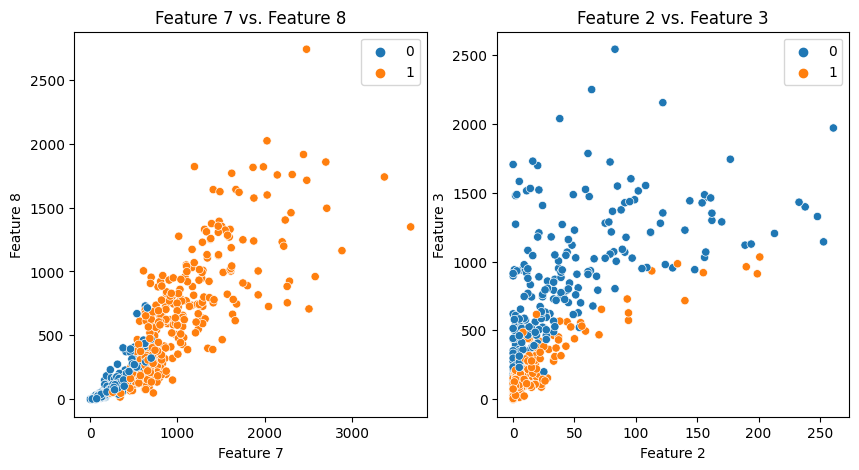

In [8]:
# Creating the figure
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Converting the data to dataframe
data = pd.DataFrame(X_test)
legend = [1, 2]

# First plot
axes[0].set_title("Feature 7 vs. Feature 8")
sns.scatterplot(data=data, x=data.iloc[:,6], y=data.iloc[:,7], hue=pred, ax=axes[0])
axes[0].set_xlabel("Feature 7")
axes[0].set_ylabel("Feature 8")

# Second plot
axes[1].set_title("Feature 2 vs. Feature 3")
sns.scatterplot(data=data, x=data.iloc[:,1], y=data.iloc[:,2], hue=pred, ax=axes[1])
axes[1].set_xlabel("Feature 2")
axes[1].set_ylabel("Feature 3")




# Exercise 5

## Preperation

In [9]:
# Importing dependencies
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.image import imread

In [10]:
# Loading image
im = imread("./dog.jpg")
img_size = im.shape
X = im.reshape(img_size[0] * img_size[1], img_size[2])

In [11]:
# Initialization
starting_point_list = np.unique(X, axis=0)

In [12]:
# Finding optimal k
sum_squared_distances = []
for k in range(1, 11):
    kMeans = KMeans(n_clusters=k, algorithm="lloyd", n_init=1, init=starting_point_list[:k]).fit(X)
    sum_squared_distances.append(kMeans.inertia_)

Optimal # Clusters: 3
Inertia value: 25430780968.224243


/Users/mlc/miniconda3/envs/itdsA3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mlc/miniconda3/envs/itdsA3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


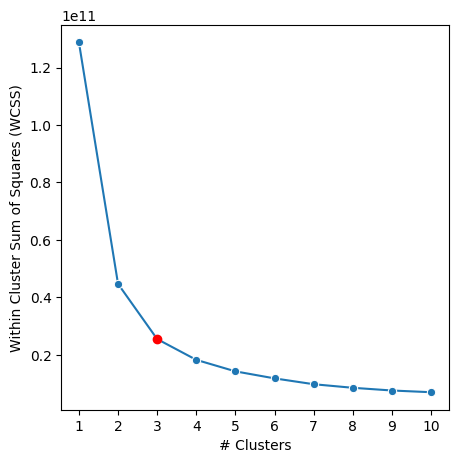

In [13]:
# Plotting the sum squared distances
plt.figure(figsize=(5, 5))
sns.lineplot(
    x=range(1,11),
    y=sum_squared_distances,
    marker="o",
    markers=True,
)
plt.plot([3], sum_squared_distances[2], marker="o", color="r")
plt.xticks(range(1, 11))
plt.xlabel("# Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")

print(f"Optimal # Clusters: 3\nInertia value: {sum_squared_distances[2]}")

In [14]:
best_k = 3
kMeans = KMeans(n_clusters=best_k, algorithm="lloyd", n_init=1, init=starting_point_list[:best_k]).fit(X)
cluster_centers = kMeans.cluster_centers_
print(kMeans.cluster_centers_)

[[ 75.76441379  78.27792325  71.50806809]
 [195.46258686 196.2456907  198.74591151]
 [142.66397609 146.77047542 133.97110142]]


In [15]:
# Assigning clusters to the data itself
cluster_center_indices = kMeans.predict(X=X)
cluster_centers_for_data_points = cluster_centers[cluster_center_indices]

In [16]:
# Assert that compressed image is within [0,255] pixel value range.
X_compress = np.clip(cluster_centers_for_data_points.astype('uint8'), 0, 255)
# Reshape X_compress to have the same dimension as the original image 3265 * 4898 * 3
X_compress = X_compress.reshape(img_size[0], img_size[1], img_size[2])

Text(0, 0.5, 'Axis 0 pixels')

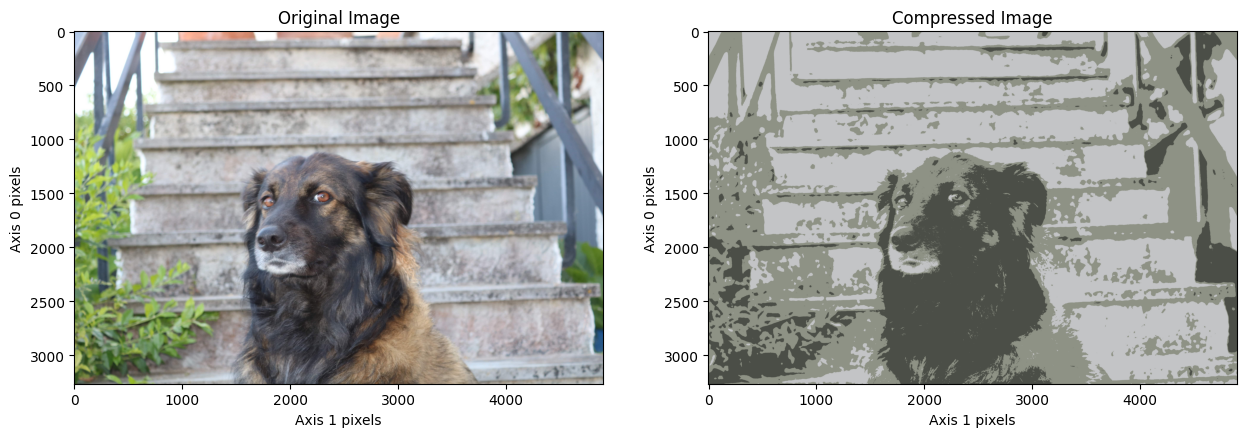

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


axes[0].imshow(im)
axes[0].set_title("Original Image")
axes[0].set_xlabel("Axis 1 pixels")
axes[0].set_ylabel("Axis 0 pixels")

axes[1].imshow(X_compress)
axes[1].set_title("Compressed Image")
axes[1].set_xlabel("Axis 1 pixels")
axes[1].set_ylabel("Axis 0 pixels")
